The optimization for logistic loss can be implemented by using my source code `solutions.py`, which can be found  __[HERE](https://github.com/trongdle/trongdle.github.io/blob/main/posts/gradient/solutions.py)__. In this code, loss optimization is implemented in three ways with the gradient descent: plain gradient descent, batch gradient descent, and gradient descent with momentum.

Below is our data, which is not linearly separable.

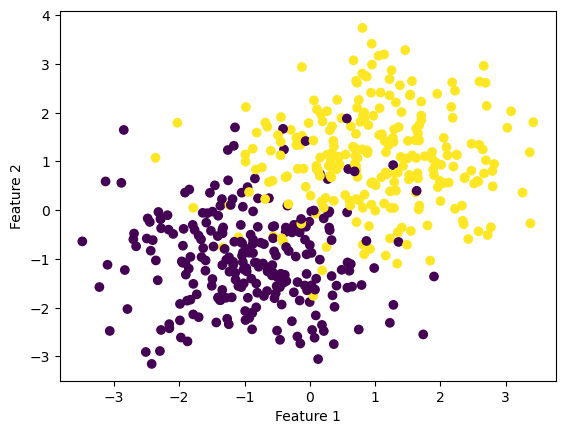

In [14]:
from solutions import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 500, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

# 1. Gradient Descent

The gradient descent algorithm is implemented when the `LogisticRegression.fit(X, y)` is called. $\textbf{X}$ is the feature matrix, and $\textbf{y}$ is the target vector, as we know from the perceptron blog post. We need to find a weight vector that can minimize the logistic loss on $\textbf{X}$ and $\textbf{y}$ by updating the weight in a loop. At every loop:

- compute the gradient descent of the logistic loss, which is given by 
$$\nabla L(\textbf{w}) = \frac{1}{n} \sum^n_{i=1} (\sigma (\langle \textbf{w}, \textbf{x}_i \rangle), y_i) \textbf{w}_i, $$
where $\sigma(z)$ denotes the sigmoid function.
- update the weight until the logistic loss does not change
$$\textbf{w}^{(t+1)} = \textbf{w}^{(t)} - \alpha \nabla L(\textbf{w}^{(t)})$$

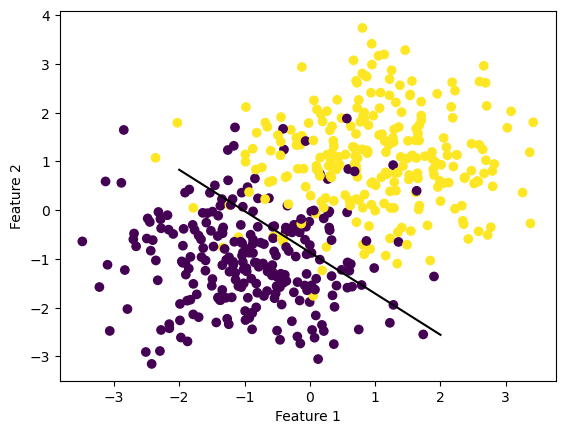

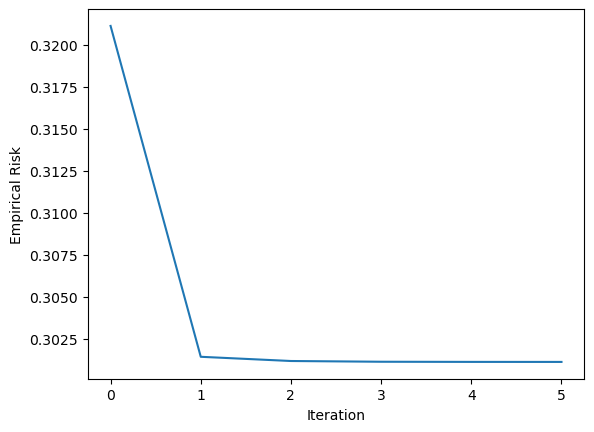

In [15]:
# fit the model

LR = LogisticRegression()
LR.fit(X, y, alpha = 10, max_epochs = 1000)

# inspect the fitted value of w
LR.w 

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

figy, axy = plt.subplots()
axy.scatter(X[:,0], X[:,1], c = y)
draw_line(LR.w, -2, 2)
axy.set_xlabel("Feature 1")
axy.set_ylabel("Feature 2")

figx, axv = plt.subplots()
axv.plot(LR.loss_history)
axv.set_xlabel("Iteration")
axv.set_ylabel("Empirical Risk")
plt.show()

In this case, the learning rate was set very high to 10, which caused the algorithm to converge too soon and leave the logistic loss at 0.30. As we change the learning rate to 0.1, we can see that the loss fell to 0.27.

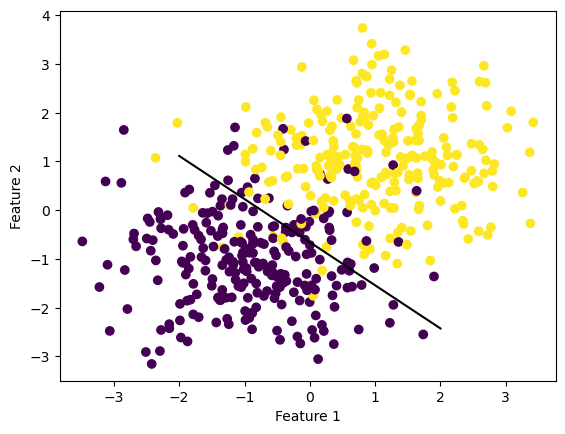

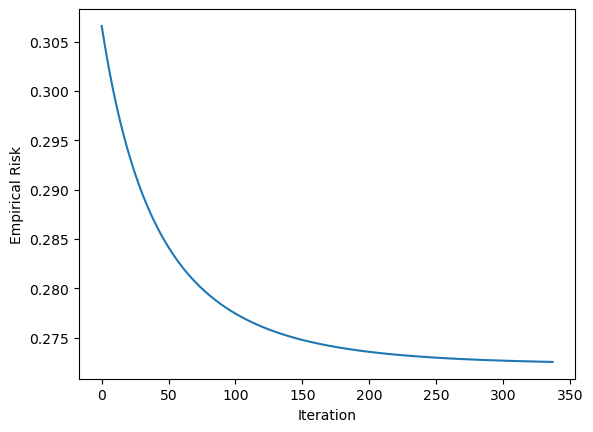

In [16]:
LR = LogisticRegression()
LR.fit(X, y, alpha=0.1, max_epochs=1000)

figy, axy = plt.subplots()
axy.scatter(X[:,0], X[:,1], c = y)
draw_line(LR.w, -2, 2)
axy.set_xlabel("Feature 1")
axy.set_ylabel("Feature 2")

figx, axv = plt.subplots()
axv.plot(LR.loss_history)
axv.set_xlabel("Iteration")
axv.set_ylabel("Empirical Risk")
plt.show()

# 2. Stochastic Gradient Descent

The stochastic gradient descent algorithm is implemented by the `LogisticRegression.fit_stochastic(X, y)` method. In this algorithm, instead of computing the complete gradient as in part 1, we compute a _stochastic gradient_ by picking a random subset $S \subseteq [n] = \{1, ..., n\}$ and computing

$$\nabla_S L(\textbf{w}) = \frac{1}{|S|} \sum_{i \in S} \nabla (\sigma (\langle \textbf{w}, \textbf{x}_i \rangle), y_i)\textbf{x}_i $$

The size of $S$ is the _batch size_, which we can refer to as $k$. The batch gradient descent is performed as follows:
1. Shuffle the points randomly.
2. Pick the first $k$ random points, compute the stochastic gradient, and then perform an update.
3. Pick the next $k$ random points and repeat..
4. When we have gone through all $n$ points, reshuffle them all randomly and proceed again.

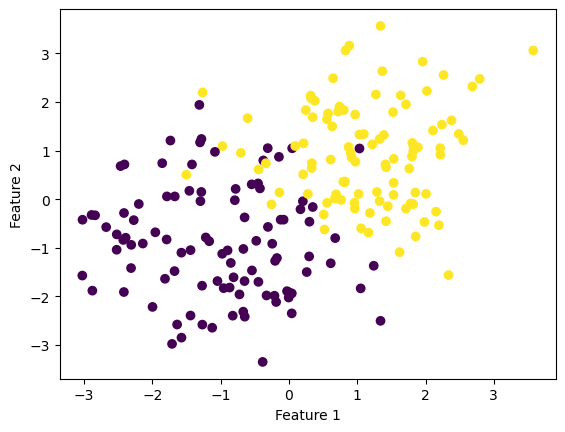

In [55]:
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In this experiment, we can see how the stochastic gradient descent algorithm can outperform the original gradient descent method.

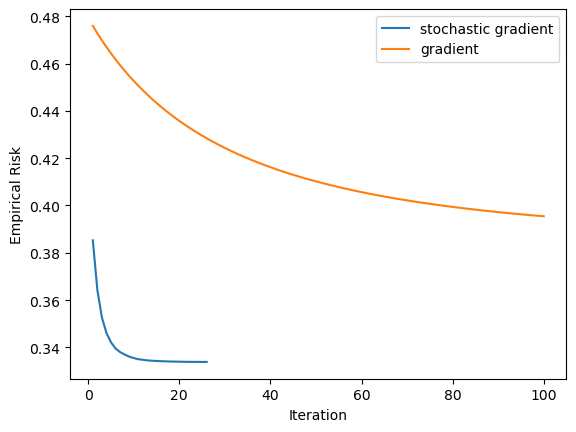

In [57]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .1, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")
plt.xlabel("Iteration")
plt.ylabel("Empirical Risk")
legend = plt.legend() 

The stochastic gradient method used only 25 loops, while the gradient method still had not converged at loop 100.

# 3. Stochastic Gradient Descent with Momentum

This only difference in this method comes from the momentum factor $\beta$. The weight update is given by

$$\textbf{w}^{(t+1)} = \textbf{w}^{(t)} - \alpha \nabla L(\textbf{w}^{(t)}) + \beta (\textbf{w}^{(t)}-\textbf{w}^{(t-1)})$$

The idea here is that if the previous weight update was good, we may want to continue moving along this direction. To test how the momentum can help with accelerating convergence, we choose a small sample size of 150, distributed among 10 features.

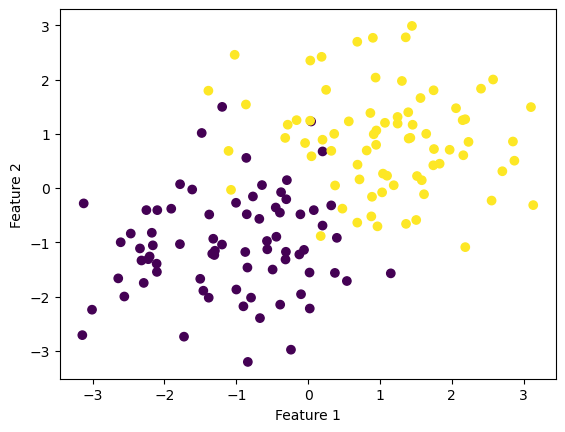

In [74]:
np.seterr(all='ignore') 

# make the data
p_features = 11
X, y = make_blobs(n_samples = 150, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

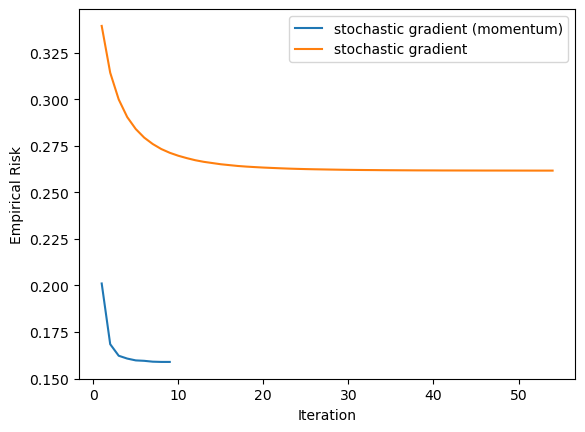

In [80]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = .1) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")


LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")
legend = plt.legend() 
plt.xlabel("Iteration")
plt.ylabel("Empirical Risk")
plt.show()

The momentum algorithm converges in less than a quarter of the loops it takes the other method.